# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель проекта - научиться определять рыночную стоимость объектов недвижимости. Для этого, необходимо установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Перед началом исследования необходимо убедиться в корректности предоставленной информации. Откроем таблицу и изучим данные:

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('real_estate_data.csv', sep='\t', decimal=',')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


По первому взгляду можно сказать, что в данных имеется множество замечаний. Но, обо всем по порядку.

## Предобработка данных

### Переименование столбцов

Приведем названия столбцов к единому виду. Уберем верхний регистр у `cityCenters_nearest` и запишем `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` в "змеином_регистре".

In [98]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                        'parks_around3000': 'parks_around_3000',
                        'ponds_around3000': 'ponds_around_3000'})
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Проверка дубликатов

Проверим наличие дубликатов в данных:

In [99]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

### Заполнение пропусков

Проверим наличие пропущенных значений в таблице. Выведем общую информацию:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

В таблице пропущено достаточно много значений. Заполним пропуски там, где это уместно. Пропущенные значения в столбце `balcony`  заполним нулем, так как эти данные заполнялись человеком и отсутствующее значение скорее всего говорит о том, что балкона в квартире нет.

In [101]:
df['balcony'] = df['balcony'].fillna('0') # замена пропущенных значений нулем

Для определения наиболее подходящего значения для заполнения пропусков в столбцах `living_area` и `kitchen_area`, необходимо построить их гистограммы. Для этого приведем значения данных столбцов к типу float: 

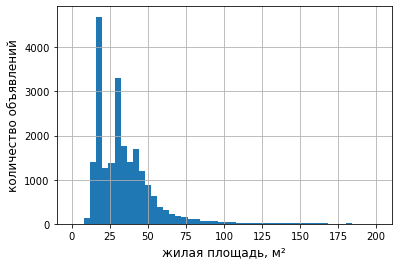

In [102]:
df['living_area'] = df['living_area'].astype('float') # приведение данных к типу float
df['living_area'].plot(kind='hist', bins=50, grid=True, range=(0, 200))
plt.xlabel('жилая площадь, м²', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

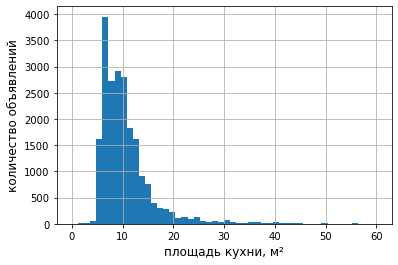

In [103]:
df['kitchen_area'] = df['kitchen_area'].astype('float') # приведение данных к типу float
df['kitchen_area'].plot(kind='hist', bins=50, grid=True, range=(0, 60))
plt.xlabel('площадь кухни, м²', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

На графиках видно, что имеются значения, которые сильно выделяются из общего числа данных. Поэтому целесообразно заполнить пропуски медианным значением:

In [104]:
median_living = df['living_area'].median() # медиана
median_kitchen = df['kitchen_area'].median()
df['living_area'] = df['living_area'].fillna(median_living) # заполнение пропусков значением медианы
df['kitchen_area'] = df['kitchen_area'].fillna(median_kitchen)
df.info() # проверка заполнения пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  object 
 2   total_area            23699 non-null  object 
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  object 
 6   floors_total          23613 non-null  object 
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропущенные значения в остальных столбцах оставим без изменений, их наличие на результат не повлияет. Далее проверим, не превышает ли сумма площадей кухни и жилой площади общую площадь:

In [105]:
df['total_area'] = df['total_area'].astype('float') # приведение данных к типу float
df[(df['living_area'] + df['kitchen_area']) > df['total_area']]['total_area'].count()

741

Данные не сходятся в 741 объявлении. В них оставим пропуски без изменений, вернем значения `Nan`:

In [106]:
df.loc[df['living_area']==median_living, 'living_area']=None
df.loc[df['kitchen_area']==median_kitchen, 'kitchen_area']=None
df[(df['living_area']+df['kitchen_area'])>df['total_area']]['total_area'].count() # проверка

59

Осталось еще 59 объявлений. Это уже ошибка в данных, связанная с человеческим фактором. Так как количество таких объявлений составляет меньше 1% данных, на результат исследования они не повлияют.

## Расчеты и добавление данных в таблицу

Посчитаем и добавим в таблицу:
- цену квадратно метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

При выполнении расчетов, переведем значения столбцов к соответствующим типам данных.

In [107]:
# Добавление столбца с ценой квадратного метра
df['last_price'] = df['last_price'].astype('float') # приведение значений к типу float
df['total_area'] = df['total_area'].astype('float') 
df['price_area'] = df['last_price']/df['total_area'] # цена квадратного метра

# Добавление столбцов с днем недели, месяца и года публикации объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['weekday'] = df['first_day_exposition'].dt.weekday # столбец с днями недели
df['month'] =  df['first_day_exposition'].apply(lambda x:x.strftime('%Y-%m')) # столбец с месяцем и годом

# Добавление столбца с этажем квартиры
df['floors_total'] = df['floors_total'].astype('float') # приведение значений к типу float
def apartment_floor(row): # создание функции этажей квартир
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == max_floor:
        return 'последний'
    return 'другой'
df['new_floor'] = df.apply(apartment_floor, axis=1) # создание нового столбца new_floor

# Добавление столбца с соотношение жилой и общей площади
df['living_total'] = df['living_area']/df['total_area']

# Добавление столбца с соотношение площади кухни к общей
df['kitchen_total'] = df['kitchen_area']/df['total_area']

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Для этого построим гистограммы для каждого параметра.

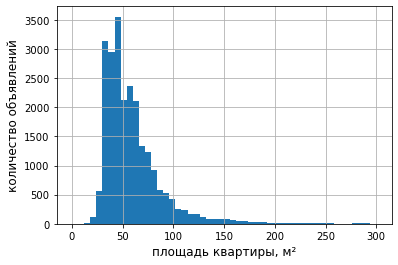

In [108]:
df['total_area'].plot(kind='hist', bins=50, grid=True, range=(0, 300)) # гистограмма общей площади квартир
plt.xlabel('площадь квартиры, м²', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

Большая часть квартир имеет площадь примерно равной от 25 до 100 квадратных метров. При этом имеются апартаменты, площадь которых достигает почти 300 квадратных метров.

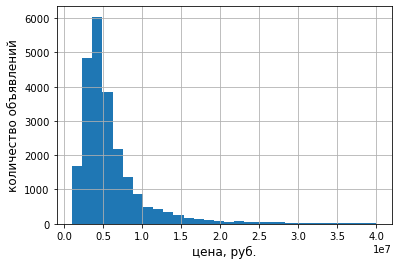

In [109]:
df['last_price'].plot(kind='hist', bins=30, grid=True, range=(1000000,40000000)) # гистограмма цены
plt.xlabel('цена, руб.', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

У цен на квартиры довольно большой размах. Большая часть имеет стоимость от 1 до 10 млн.

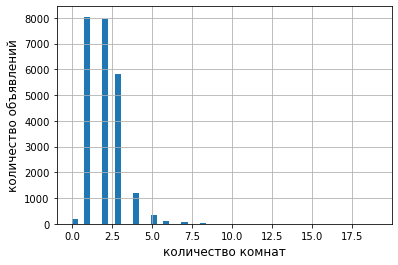

In [110]:
df['rooms'].plot(kind='hist', bins=50, grid=True) # гистограмма количества комнат
plt.xlabel('количество комнат', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

Судя по графику, в лидерах объявлений квартиры с 1 и 2 комнатами.

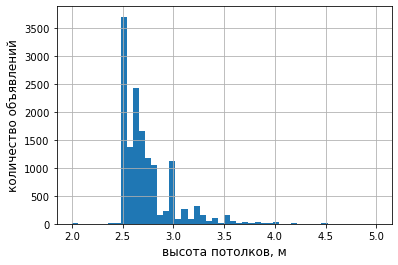

In [111]:
df['ceiling_height'] = df['ceiling_height'].astype('float')
df['ceiling_height'].plot(kind='hist', bins=50, grid=True, range=(2, 5)) # гистограмма высоты потолков
plt.xlabel('высота потолков, м', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

Больше всего квартир с высотой потолков около 2.5 метров.

Изучим время продажи квартир:

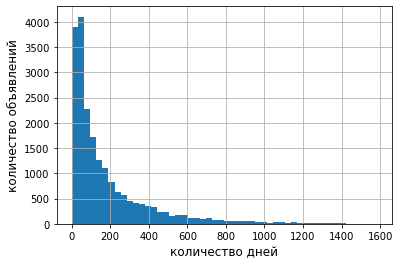

In [112]:
df['days_exposition'] = df['days_exposition'].astype('float') # приведение значений к типу float
df['days_exposition'].plot(kind='hist', bins=50, grid=True) # гистограмма времени продажи квартир
plt.xlabel('количество дней', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

Посчитаем среднее значение и медиану:

In [113]:
mean_exposition = df['days_exposition'].mean()
median_exposition = df['days_exposition'].median()
mean_exposition, median_exposition

(180.88863436982163, 95.0)

С учетом большого разброса, среднее значение (180) получилось довольно большим по сравнению с медианой (95). Исходя из этого, можно сказать, что обычно продажа квартиры занимает около 95 дней. Для более детального разбора времени продаж воспользуемся методом `describe()`:

In [114]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана диаграммы размаха находится в диапазоне от 45 до 232 дней. Время продажи квартир в этом диапазоне является нормальным. Следовательно можно полагать, что квартиры ушедшие менее чем за 45 дней продались очень быстро, а квартиры, объявления которых сняли после 232 дня, продавались необычно долго.

Избавимся от выбросов в данных. Для этого, с помощью метода `describe()` определим границы значений у каждого параметра, с которых начинаются выбросы.

In [115]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,days_exposition,price_area,weekday,living_total,kitchen_total
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21198.000000,23699.000000,21339.000000,20518.000000,2.369900e+04,23699.000000,21198.000000,21339.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.583609,5.892358,10.575455,180.888634,9.942166e+04,2.569307,0.563936,0.187338
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.326134,4.885249,5.916070,219.727988,5.030680e+04,1.789082,0.105855,0.073029
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,1.000000,1.118349e+02,0.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.500000,2.000000,7.000000,45.000000,7.658547e+04,1.000000,0.493028,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.200000,95.000000,9.500000e+04,3.000000,0.566667,0.172358
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.800000,8.000000,12.000000,232.000000,1.142563e+05,4.000000,0.636735,0.232162
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,1580.000000,1.907500e+06,6.000000,1.000000,0.787879


In [116]:
new_df=df[df['total_area']<115] # отбрасывание аномалий общей площади
new_df=df[df['last_price']<12000000] # отбрасывание аномалий цены
new_df=df[df['ceiling_height']<3.25] # отбрасывание аномалий высоты потолков
new_df=df[df['days_exposition']<512] # отбрасывание аномалий времени продажи квартир

Изучим зависимость цены от площади, числа комнат, удалённости от центра. Далее изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года. При построении графиков, отбросим все выбросы данных.

Для определения зависимости цены от площади, числа комнат и удаленности от центра, найдем коэффициент корреляции Пирсона. Далее отразим получившуюся зависимость на графиках, используя метод `sns.pairplot()`.

In [117]:
new_df['city_centers_nearest'] = new_df['city_centers_nearest'].astype('float') # приведение значений к типу float
new_df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr() 

C:\Users\Webasto\AppData\Local\Temp/ipykernel_15652/2199909182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['city_centers_nearest'] = new_df['city_centers_nearest'].astype('float') # приведение значений к типу float


,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.629700,0.341929,-0.183508
total_area,0.629700,1.000000,0.755535,-0.214177
rooms,0.341929,0.755535,1.000000,-0.171413
city_centers_nearest,-0.183508,-0.214177,-0.171413,1.000000


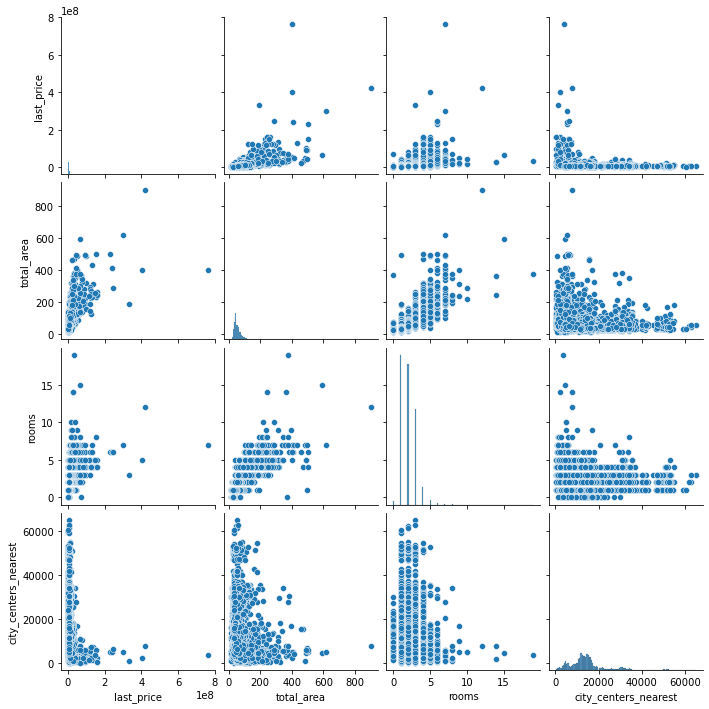

In [118]:
sns.pairplot(new_df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.show()

Изучим получившиеся результаты:

- С ростом площади квартиры, плавно увеличивается цена, что подтверждает коэффициент корреляции Пирсона, равный 0.65.
- С ростом количества комнат растет и цена. Однако эта зависимость не так сильно выражена по сравнению с зависимостью от площади. Большая разница в цене наблюдается между одно-, двух- и трехкомнатными квартирами.
- Самые дорогие квартиры в центре. На удаленности после 10 км наблюдается плавное снижение цены, а после 20 км и вовсе выравнивается.

Найдем зависимость цены от этажа:

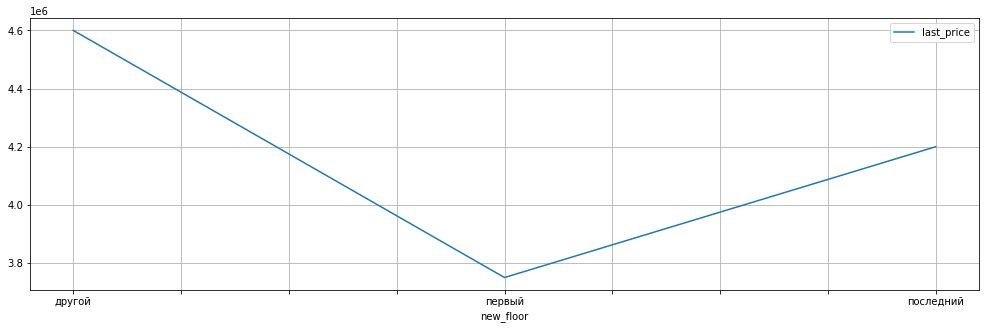

In [119]:
new_df.query('last_price < 30000000')\
      .pivot_table(index='new_floor', values='last_price', aggfunc='median')\
      .plot(grid=True, figsize=(17, 5))
plt.show()

Квартиры, расположенные на "других" этажах в среднем дороже.

Зависимость цены от дня недели размещения объявления:

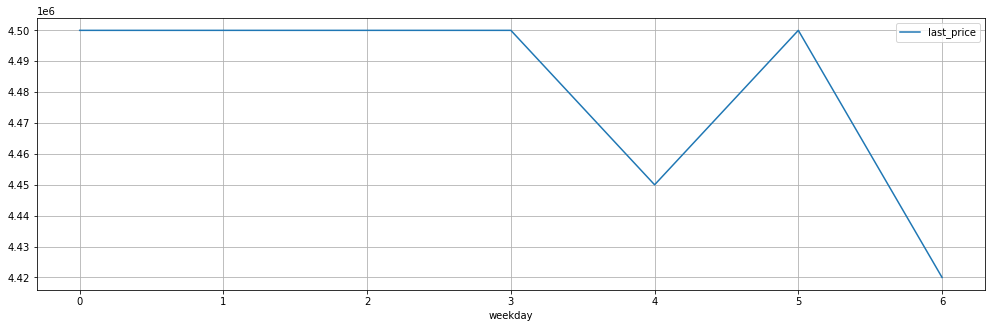

In [120]:
new_df.pivot_table(index='weekday', values='last_price', aggfunc='median')\
      .plot(grid=True, figsize=(17, 5))
plt.show()

Самые низкие цены у квартир, объявление которых выложили в пятницу и воскресенье.

Зависимость цены от месяца и года размещения объявления:

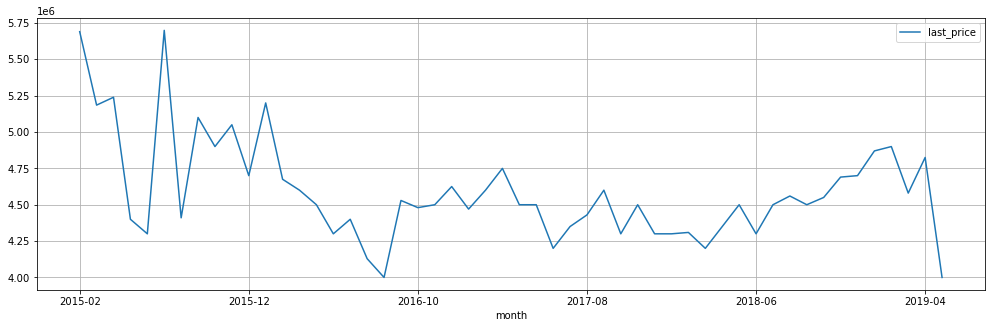

In [121]:
new_df.pivot_table(index='month', values='last_price', aggfunc='median')\
      .plot(grid=True, figsize=(17, 5))
plt.show()

Наблюдается резкое падение цен до конца 2016 года. Далее цены стабилизировались.

Определим 10 населённых пунктов с наибольшим числом объявлений:

In [122]:
new_df['locality_name'].value_counts().head(10)

Санкт-Петербург      12474
посёлок Мурино         486
посёлок Шушары         388
Всеволожск             308
Колпино                294
посёлок Парголово      288
Пушкин                 278
деревня Кудрово        268
Гатчина                244
Выборг                 193
Name: locality_name, dtype: int64

Посчитаем среднюю цену квадратного метра в этих населённых пунктах:

In [123]:
# средняя цена квадратного метра
average_price = new_df.pivot_table(index='locality_name', values='price_area', aggfunc=['mean', 'count'])

 # переименование столбцов
average_price.columns = ['price_area', 'count']

# отбрасываем дробную часть
average_price['price_area'] = average_price['price_area'].astype('int') 

# 10 населенных пунктов с наибольшим числом объявлений и средней ценой квадратного метра
average_price.sort_values(by = 'count', ascending = False).head(10) 

,price_area,count
locality_name,,
Санкт-Петербург,111742,12474
посёлок Мурино,86047,486
посёлок Шушары,77914,388
Всеволожск,68605,308
Колпино,74748,294
посёлок Парголово,89162,288
Пушкин,101894,278
деревня Кудрово,92670,268
Гатчина,68065,244


Самые высокие цены на жильё в Санкт-Петербурге и в Пушкине. Самые низкие в Выборге.

Изучим предложения квартир. Выделим квартиры в Санкт-Петербурге:

C:\Users\Webasto\AppData\Local\Temp/ipykernel_15652/3877553458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['city_centers_nearest'] = spb['city_centers_nearest'].astype('float') # приведение значений к типу float
C:\Users\Webasto\AppData\Local\Temp/ipykernel_15652/3877553458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['city_centers_nearest'] = spb['city_centers_nearest'].fillna(median_city)
C:\Users\Webasto\AppData\Local\Temp/ipykernel_15652/3877553458.py:8: SettingWithCopyWarning: 
A

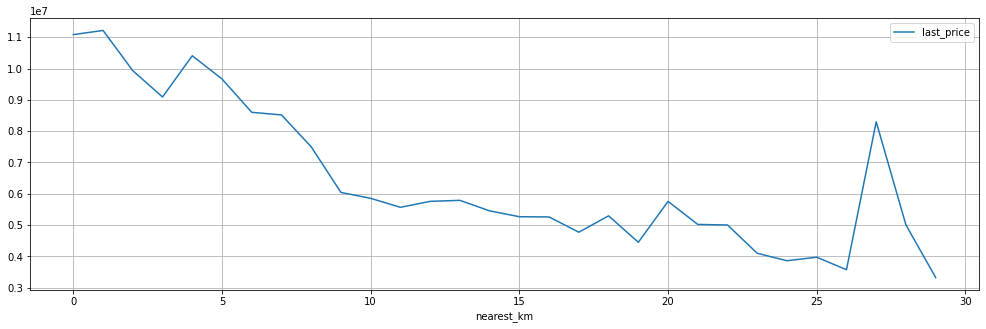

In [124]:
spb = new_df.query('locality_name == "Санкт-Петербург"') # срез по Санкт-Петербургу
spb['city_centers_nearest'] = spb['city_centers_nearest'].astype('float') # приведение значений к типу float

# Заполнение пропусков медианным значением
median_city = spb['city_centers_nearest'].median()
spb['city_centers_nearest'] = spb['city_centers_nearest'].fillna(median_city)

spb['nearest_km'] = (spb['city_centers_nearest']/1000).astype('int') # перевод расстояния в км

# средняя цена для каждого км
spb.query('last_price < 30000000')\
   .pivot_table(index='nearest_km', values='last_price', aggfunc='mean')\
   .plot(grid=True, figsize=(17, 5))
plt.show()

На удаленности около 9 км график меняет свой характер. Увеличим эту область для наглядности:

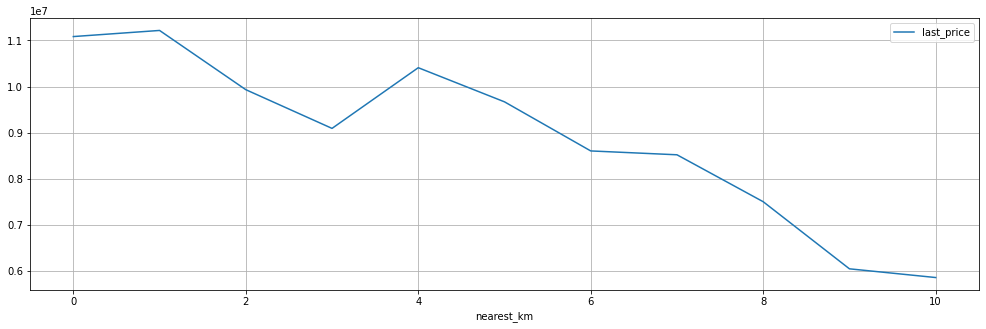

In [125]:
spb.query('last_price < 30000000 and nearest_km < 11').pivot_table(index='nearest_km', values='last_price', aggfunc='mean')\
   .plot(grid=True, figsize=(17, 5))
plt.show()

Центральная зона ограничивается 9 км.

Выделим сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

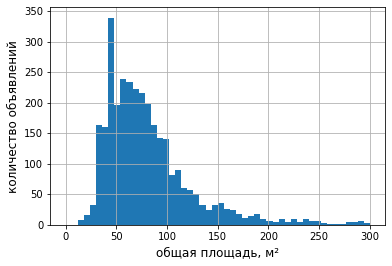

In [126]:
spb = spb.query('nearest_km < 9') # сегмент квартир в центре
spb['total_area'].plot(kind='hist', bins=50, grid=True, range=(0, 300)) # гистограмма общей площади
plt.xlabel('общая площадь, м²', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

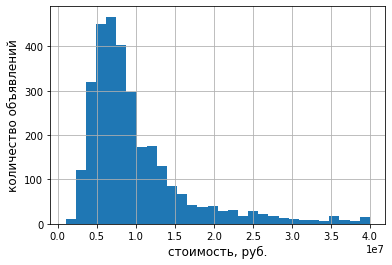

In [127]:
spb['last_price'].plot(kind='hist', bins=30, grid=True, range=(1000000,40000000)) # гистограмма цены
plt.xlabel('стоимость, руб.', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

Пиковые части диаграмм сместились вправо. Следовательно, можно утверждать, что большая часть квартир центрального района дороже, а общая площадь выше, если сравнивать с данными за всю область.

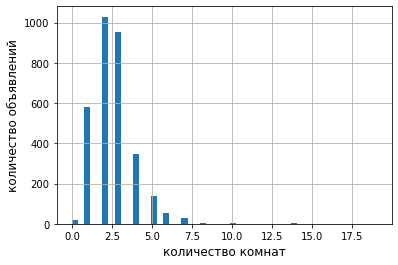

In [128]:
spb['rooms'].plot(kind='hist', bins=50, grid=True) # гистограмма количества комнат
plt.xlabel('количество комнат', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

В центральном районе преобладают двухкомнатные квартиры.

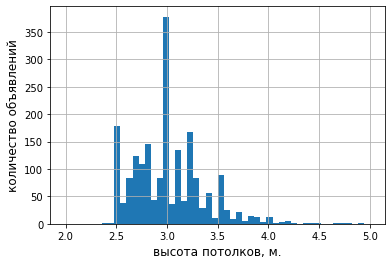

In [129]:
spb['ceiling_height'].plot(kind='hist', bins=50, grid=True, range=(2, 5)) # гистограмма высоты потолков
plt.xlabel('высота потолков, м.', fontsize=12)
plt.ylabel('количество объявлений', fontsize=12)
plt.show()

Самые распространенные квартиры с высотой потолков 3 метра.

Далее изучим зависимость цены квартир в центральном районе от числа комнат, этажа, удалённости от центра и даты размещения объявления, после чего полученные результаты сравним с результатами по общей базе. Для этого для зависимости от числа комнат и удалённости от центра найдем коэффициент корреляции Пирсона. Далее отразим получившуюся зависимость на графиках, используя метод `sns.pairplot()`. Зависимость остальных параметров отразим на обычных графиках.

In [130]:
spb[['last_price', 'rooms', 'city_centers_nearest']].corr() 

,last_price,rooms,city_centers_nearest
last_price,1.000000,0.348605,-0.097759
rooms,0.348605,1.000000,-0.228156
city_centers_nearest,-0.097759,-0.228156,1.000000


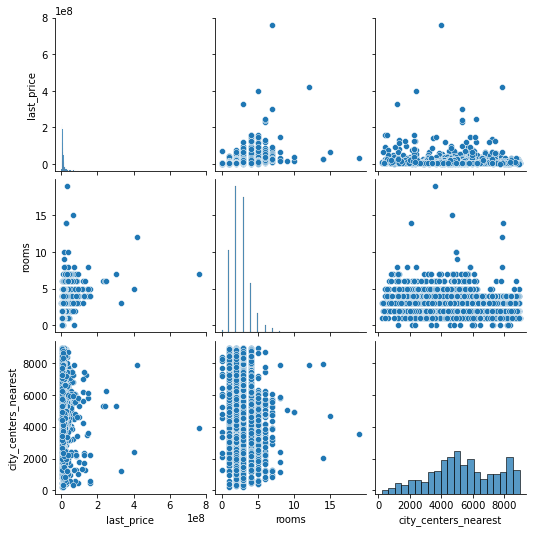

In [131]:
sns.pairplot(spb[['last_price', 'rooms', 'city_centers_nearest']])
plt.show()

Изучим получившиеся результаты:

- С ростом количества комнат растет и цена. Самые дорогие квартиры с 4 и 5 комнатами.
- Стоимость квартир в центре примерно одинаковая, цена изменяется незначительно.

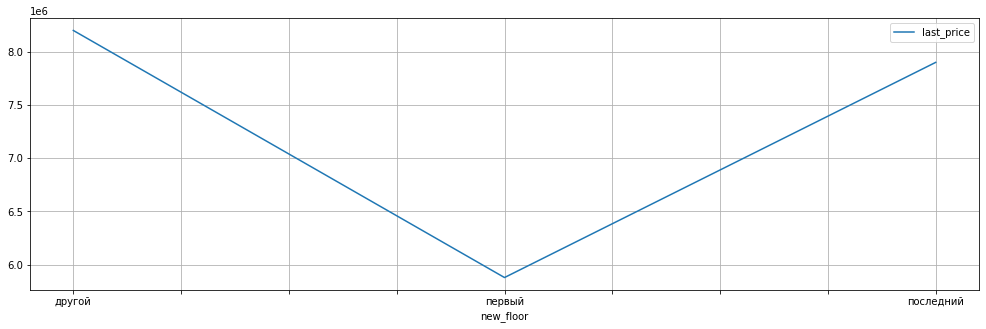

In [132]:
spb.query('last_price < 30000000')\
   .pivot_table(index='new_floor', values='last_price', aggfunc='median')\
   .plot(grid=True, figsize=(17, 5))
plt.show()

Цены квартир, расположенных на последних этажах выросли, по сравнению с результатами по общей базе.

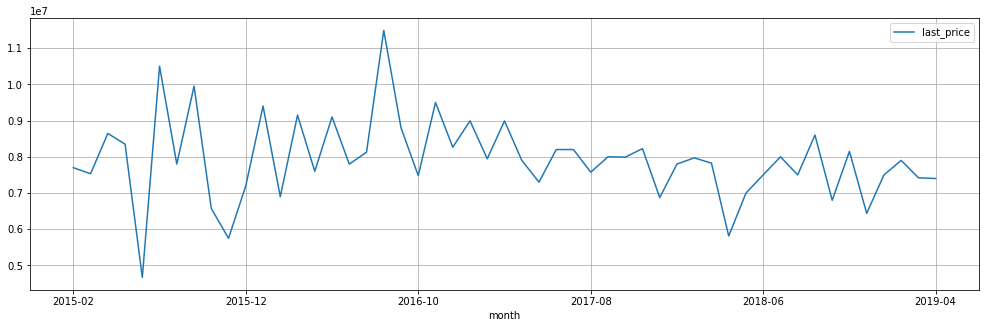

In [133]:
spb.query('last_price < 30000000')\
   .pivot_table(index='month', values='last_price', aggfunc='median')\
   .plot(grid=True, figsize=(17, 5))
plt.show()

В центральном районе города стоимость квартир падала более плавно на фоне падения цен общей базы.

## Общий вывод

Задача проекта — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. В начале исследования была проведена предобработка данных, предоставленных заказчиком, а именно, заполнены пропуски, удалены дубликаты. Для выполнения задачи, необходимо было изучить зависимость стоимости квартир от следующих параметров: площадь, число комнат, этаж, удалённость от центра, дата размещения объявления. Также, необходимо было определить населенные пункты самой высокой и самой низкой стоимостью жилья, границы центрального района Санкт-Петербурга и факторы ценообразования в нем. Проведенный анализ показал:
- Большее влияние на ценообразование квартиры оказывает количество комнат, а следовательно и общая площадь. 
- Самые дешевые квартиры находятся на первых и последних этажах. Влияние последнего этажа на ценообразование в центральном районе Санкт-Петербурга выше, чем в остальных районах.
- Центральный район Санкт-Петербурга ограничивается 9 км, и чем дальше от центра, тем дешевле квартиры. Цены на квартиры в центре города в среднем на 3 млн. дороже средней стоймости в других районах. 
- Самые дорогие квартиры продаются в Санкт-Петербурге, самые дешевые в Выборге.
